In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Read Dataset

In [2]:
data = pd.read_csv('Weather-Data.csv')
data.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog


In [5]:
data.shape

(8784, 8)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date/Time         8784 non-null   object 
 1   Temp_C            8784 non-null   float64
 2   Dew Point Temp_C  8784 non-null   float64
 3   Rel Hum_%         8784 non-null   int64  
 4   Wind Speed_km/h   8784 non-null   int64  
 5   Visibility_km     8784 non-null   float64
 6   Press_kPa         8784 non-null   float64
 7   Weather           8784 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 549.1+ KB


In [6]:
data.isna().sum()

Date/Time           0
Temp_C              0
Dew Point Temp_C    0
Rel Hum_%           0
Wind Speed_km/h     0
Visibility_km       0
Press_kPa           0
Weather             0
dtype: int64

In [7]:
data.duplicated().sum()

0

# Unique values of "Wind Speed"  

In [8]:
data['Wind Speed_km/h'].unique()

array([ 4,  7,  6,  9, 15, 13, 20, 22, 19, 24, 30, 35, 39, 32, 33, 26, 44,
       43, 48, 37, 28, 17, 11,  0, 83, 70, 57, 46, 41, 52, 50, 63, 54,  2],
      dtype=int64)

# Unique values of "Weather"  

In [9]:
data['Weather'].unique()

array(['Fog', 'Freezing Drizzle,Fog', 'Mostly Cloudy', 'Cloudy', 'Rain',
       'Rain Showers', 'Mainly Clear', 'Snow Showers', 'Snow', 'Clear',
       'Freezing Rain,Fog', 'Freezing Rain', 'Freezing Drizzle',
       'Rain,Snow', 'Moderate Snow', 'Freezing Drizzle,Snow',
       'Freezing Rain,Snow Grains', 'Snow,Blowing Snow', 'Freezing Fog',
       'Haze', 'Rain,Fog', 'Drizzle,Fog', 'Drizzle',
       'Freezing Drizzle,Haze', 'Freezing Rain,Haze', 'Snow,Haze',
       'Snow,Fog', 'Snow,Ice Pellets', 'Rain,Haze', 'Thunderstorms,Rain',
       'Thunderstorms,Rain Showers', 'Thunderstorms,Heavy Rain Showers',
       'Thunderstorms,Rain Showers,Fog', 'Thunderstorms',
       'Thunderstorms,Rain,Fog',
       'Thunderstorms,Moderate Rain Showers,Fog', 'Rain Showers,Fog',
       'Rain Showers,Snow Showers', 'Snow Pellets', 'Rain,Snow,Fog',
       'Moderate Rain,Fog', 'Freezing Rain,Ice Pellets,Fog',
       'Drizzle,Ice Pellets,Fog', 'Drizzle,Snow', 'Rain,Ice Pellets',
       'Drizzle,Snow,Fog', 

In [10]:
data['Weather'].nunique()

50

# Find the number of times when the "Weather" is Clear 

In [24]:
data[data['Weather'] == 'Clear']

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
67,1/3/2012 19:00,-16.9,-24.8,50,24,25.0,101.74,Clear
114,1/5/2012 18:00,-7.1,-14.4,56,11,25.0,100.71,Clear
115,1/5/2012 19:00,-9.2,-15.4,61,7,25.0,100.80,Clear
116,1/5/2012 20:00,-9.8,-15.7,62,9,25.0,100.83,Clear
117,1/5/2012 21:00,-9.0,-14.8,63,13,25.0,100.83,Clear
...,...,...,...,...,...,...,...,...
8646,12/26/2012 6:00,-13.4,-14.8,89,4,25.0,102.47,Clear
8698,12/28/2012 10:00,-6.1,-8.6,82,19,24.1,101.27,Clear
8713,12/29/2012 1:00,-11.9,-13.6,87,11,25.0,101.31,Clear
8714,12/29/2012 2:00,-11.8,-13.1,90,13,25.0,101.33,Clear


In [18]:
len(data[data['Weather'] == 'Clear'])

1326

In [23]:
data.groupby('Weather').get_group('Clear')

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
67,1/3/2012 19:00,-16.9,-24.8,50,24,25.0,101.74,Clear
114,1/5/2012 18:00,-7.1,-14.4,56,11,25.0,100.71,Clear
115,1/5/2012 19:00,-9.2,-15.4,61,7,25.0,100.80,Clear
116,1/5/2012 20:00,-9.8,-15.7,62,9,25.0,100.83,Clear
117,1/5/2012 21:00,-9.0,-14.8,63,13,25.0,100.83,Clear
...,...,...,...,...,...,...,...,...
8646,12/26/2012 6:00,-13.4,-14.8,89,4,25.0,102.47,Clear
8698,12/28/2012 10:00,-6.1,-8.6,82,19,24.1,101.27,Clear
8713,12/29/2012 1:00,-11.9,-13.6,87,11,25.0,101.31,Clear
8714,12/29/2012 2:00,-11.8,-13.1,90,13,25.0,101.33,Clear


In [22]:
len(data.groupby('Weather').get_group('Clear'))

1326

# Find the number of times when the "Wind Speed" is 4km/h

In [26]:
data[data['Wind Speed_km/h'] == 4]

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
96,1/5/2012 0:00,-8.8,-11.7,79,4,9.7,100.32,Snow
101,1/5/2012 5:00,-7.0,-9.5,82,4,4.0,100.19,Snow
146,1/7/2012 2:00,-8.1,-11.1,79,4,19.3,100.15,Cloudy
...,...,...,...,...,...,...,...,...
8768,12/31/2012 8:00,-8.6,-10.3,87,4,3.2,101.14,Snow Showers
8769,12/31/2012 9:00,-8.1,-9.6,89,4,2.4,101.09,Snow
8770,12/31/2012 10:00,-7.4,-8.9,89,4,6.4,101.05,"Snow,Fog"
8772,12/31/2012 12:00,-5.8,-7.5,88,4,12.9,100.78,Snow


# Rename the column "Weather" of dataframe to "Weather Condition"

In [4]:
data.rename(columns={'Weather':'Weather Condition'}, inplace=True)

In [5]:
data.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather Condition
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog


# Find all instances when "Weather" contains "Snow" 

In [6]:
data['Weather Condition'].unique() 

array(['Fog', 'Freezing Drizzle,Fog', 'Mostly Cloudy', 'Cloudy', 'Rain',
       'Rain Showers', 'Mainly Clear', 'Snow Showers', 'Snow', 'Clear',
       'Freezing Rain,Fog', 'Freezing Rain', 'Freezing Drizzle',
       'Rain,Snow', 'Moderate Snow', 'Freezing Drizzle,Snow',
       'Freezing Rain,Snow Grains', 'Snow,Blowing Snow', 'Freezing Fog',
       'Haze', 'Rain,Fog', 'Drizzle,Fog', 'Drizzle',
       'Freezing Drizzle,Haze', 'Freezing Rain,Haze', 'Snow,Haze',
       'Snow,Fog', 'Snow,Ice Pellets', 'Rain,Haze', 'Thunderstorms,Rain',
       'Thunderstorms,Rain Showers', 'Thunderstorms,Heavy Rain Showers',
       'Thunderstorms,Rain Showers,Fog', 'Thunderstorms',
       'Thunderstorms,Rain,Fog',
       'Thunderstorms,Moderate Rain Showers,Fog', 'Rain Showers,Fog',
       'Rain Showers,Snow Showers', 'Snow Pellets', 'Rain,Snow,Fog',
       'Moderate Rain,Fog', 'Freezing Rain,Ice Pellets,Fog',
       'Drizzle,Ice Pellets,Fog', 'Drizzle,Snow', 'Rain,Ice Pellets',
       'Drizzle,Snow,Fog', 

In [94]:
data[data['Weather Condition'].str.contains('Snow')]

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather Condition
41,1/2/2012 17:00,-2.1,-9.5,57,22,25.0,99.66,Snow Showers
44,1/2/2012 20:00,-5.6,-13.4,54,24,25.0,100.07,Snow Showers
45,1/2/2012 21:00,-5.8,-12.8,58,26,25.0,100.15,Snow Showers
47,1/2/2012 23:00,-7.4,-14.1,59,17,19.3,100.27,Snow Showers
48,1/3/2012 0:00,-9.0,-16.0,57,28,25.0,100.35,Snow Showers
...,...,...,...,...,...,...,...,...
8779,12/31/2012 19:00,0.1,-2.7,81,30,9.7,100.13,Snow
8780,12/31/2012 20:00,0.2,-2.4,83,24,9.7,100.03,Snow
8781,12/31/2012 21:00,-0.5,-1.5,93,28,4.8,99.95,Snow
8782,12/31/2012 22:00,-0.2,-1.8,89,28,9.7,99.91,Snow


In [70]:
data['Weather Condition'].value_counts() 

Mainly Clear                               2106
Mostly Cloudy                              2069
Cloudy                                     1728
Clear                                      1326
Snow                                        390
Rain                                        306
Rain Showers                                188
Fog                                         150
Rain,Fog                                    116
Drizzle,Fog                                  80
Snow Showers                                 60
Drizzle                                      41
Snow,Fog                                     37
Snow,Blowing Snow                            19
Rain,Snow                                    18
Thunderstorms,Rain Showers                   16
Haze                                         16
Drizzle,Snow,Fog                             15
Freezing Rain                                14
Freezing Drizzle,Snow                        11
Freezing Drizzle                        

In [81]:
clear = data[data['Weather Condition']== 'Clear']

In [82]:
cloudy = data[data['Weather Condition']== 'Cloudy']

In [85]:
snow = data[data['Weather Condition']== 'Snow']

In [90]:
rain = data[data['Weather Condition']== 'Rain']

In [91]:
weather = pd.concat([clear, cloudy, snow, rain ])

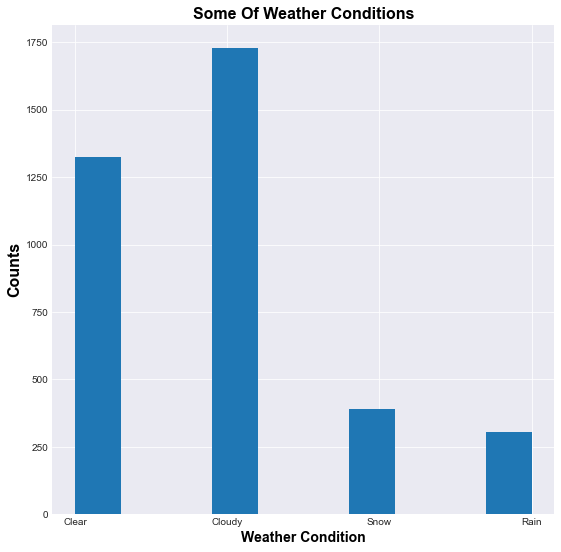

In [97]:
plt.figure(figsize = (9,9))
plt.hist(weather['Weather Condition'])
plt.title('Some Of Weather Conditions', color='black', fontweight="bold", fontsize = 16)
plt.xlabel('Weather Condition', color='black', fontweight="bold", fontsize = 14)
plt.ylabel('Counts', color='black', fontweight="bold", fontsize = 16)
plt.show()


# Find all instances when "Temp_C" above 0.0 and  "Wind Speed" equal 28

In [44]:
data[(data['Temp_C'] > 0.0) & (data['Wind Speed_km/h'] == 28)]

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather Condition
219,1/10/2012 3:00,1.6,-2.0,77,28,25.0,100.16,Snow
544,1/23/2012 16:00,3.1,-0.3,78,28,24.1,100.71,Cloudy
545,1/23/2012 17:00,3.1,-0.4,78,28,16.1,100.61,Rain
550,1/23/2012 22:00,3.6,2.2,91,28,25.0,100.10,Cloudy
558,1/24/2012 6:00,3.4,-0.6,75,28,25.0,100.45,Cloudy
...,...,...,...,...,...,...,...,...
8146,12/5/2012 10:00,2.1,-1.8,75,28,19.3,101.09,"Rain Showers,Snow Showers"
8519,12/20/2012 23:00,1.2,-2.1,79,28,25.0,100.69,Cloudy
8523,12/21/2012 3:00,0.9,0.0,94,28,4.8,100.12,"Rain,Snow,Ice Pellets"
8542,12/21/2012 22:00,0.7,0.0,95,28,3.6,97.75,Snow


# Find min&max of "Temp" against "Weather Condition"

In [7]:
min_temp = data.groupby('Weather Condition')['Temp_C'].min()

In [8]:
min_temp

Weather Condition
Clear                                     -23.3
Cloudy                                    -21.4
Drizzle                                     1.1
Drizzle,Fog                                 0.0
Drizzle,Ice Pellets,Fog                     0.4
Drizzle,Snow                                0.9
Drizzle,Snow,Fog                            0.3
Fog                                       -16.0
Freezing Drizzle                           -9.0
Freezing Drizzle,Fog                       -6.4
Freezing Drizzle,Haze                      -5.8
Freezing Drizzle,Snow                      -8.3
Freezing Fog                              -19.0
Freezing Rain                              -6.5
Freezing Rain,Fog                          -6.1
Freezing Rain,Haze                         -4.9
Freezing Rain,Ice Pellets,Fog              -2.6
Freezing Rain,Snow Grains                  -5.0
Haze                                      -11.5
Mainly Clear                              -22.8
Moderate Rain,Fog     

In [93]:
#min_temp.to_csv('min_temp.csv')

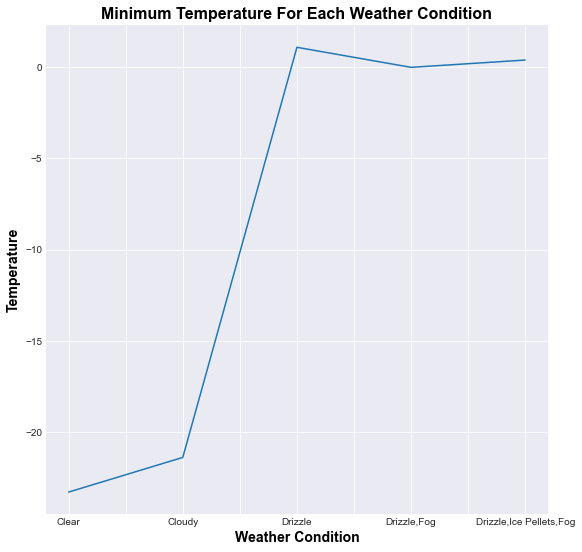

In [48]:
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(9,9))
min_temp.head().plot()
plt.title('Minimum Temperature For Each Weather Condition', color='black', fontweight="bold", fontsize = 16)
plt.xlabel('Weather Condition', color='black', fontweight="bold", fontsize = 14)
plt.ylabel('Temperature', color='black', fontweight="bold", fontsize = 14)
plt.show()

In [44]:
max_temp = data.groupby('Weather Condition')['Temp_C'].max()

In [45]:
max_temp

Weather Condition
Clear                                      32.8
Cloudy                                     30.5
Drizzle                                    18.8
Drizzle,Fog                                19.9
Drizzle,Ice Pellets,Fog                     0.4
Drizzle,Snow                                1.2
Drizzle,Snow,Fog                            1.1
Fog                                        20.8
Freezing Drizzle                           -2.3
Freezing Drizzle,Fog                       -0.3
Freezing Drizzle,Haze                      -5.0
Freezing Drizzle,Snow                      -3.3
Freezing Fog                               -0.1
Freezing Rain                               0.3
Freezing Rain,Fog                           0.1
Freezing Rain,Haze                         -4.9
Freezing Rain,Ice Pellets,Fog              -2.6
Freezing Rain,Snow Grains                  -5.0
Haze                                       14.1
Mainly Clear                               33.0
Moderate Rain,Fog     

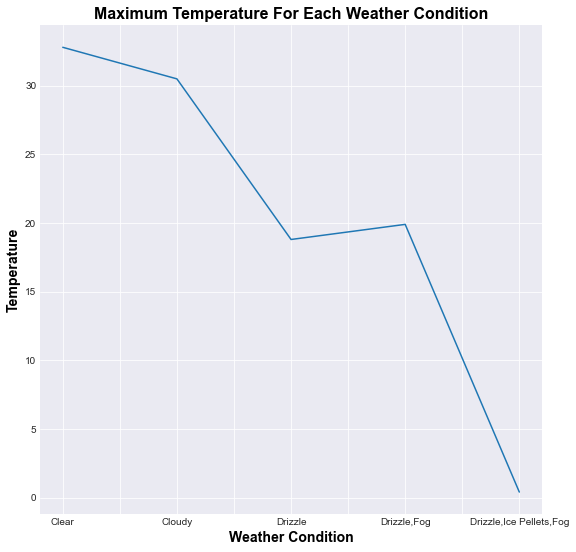

In [47]:
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(9,9))
max_temp.head().plot()
plt.title('Maximum Temperature For Each Weather Condition', color='black', fontweight="bold", fontsize = 16)
plt.xlabel('Weather Condition', color='black', fontweight="bold", fontsize = 14)
plt.ylabel('Temperature', color='black', fontweight="bold", fontsize = 14)
plt.show()

# Find all instances when 
 #### "Weather Condition" is Cloudy 
 #### or "Temp_C" is 3.1 
 #### and "Visability" is 28

In [61]:
data[(data['Weather Condition']=='Cloudy' ) | (data['Temp_C'] == 3.1 ) & (data['Visibility_km'] == 28)]

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather Condition
17,1/1/2012 17:00,3.0,0.0,81,13,16.1,99.81,Cloudy
20,1/1/2012 20:00,3.2,1.3,87,19,25.0,99.50,Cloudy
21,1/1/2012 21:00,4.0,1.7,85,20,25.0,99.39,Cloudy
23,1/1/2012 23:00,5.3,2.0,79,30,25.0,99.31,Cloudy
25,1/2/2012 1:00,4.6,0.0,72,39,25.0,99.26,Cloudy
...,...,...,...,...,...,...,...,...
8761,12/31/2012 1:00,-10.7,-14.0,77,15,25.0,101.50,Cloudy
8762,12/31/2012 2:00,-10.1,-13.4,77,9,25.0,101.45,Cloudy
8764,12/31/2012 4:00,-10.5,-12.8,83,11,25.0,101.34,Cloudy
8765,12/31/2012 5:00,-10.2,-12.4,84,6,25.0,101.28,Cloudy
